<a href="https://colab.research.google.com/github/ard714/Deepflow_stamatics/blob/main/deepflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sd
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv('data.csv', encoding='latin1')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ï»¿name                      41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   Rating                       41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  int64  
 9   listed_in(type)              41263 non-null  object 
 10  listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

ï»¿name                        0
online_order                   0
book_table                     0
Rating                         0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64
73


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(df.describe())
print(df.describe(include='object'))

             Rating         votes  approx_cost(for two people)
count  41190.000000  41190.000000                 41190.000000
mean       3.701731    352.066715                   603.545909
std        0.439929    883.461453                   464.651174
min        1.800000      0.000000                    40.000000
25%        3.400000     21.000000                   300.000000
50%        3.700000     73.000000                   500.000000
75%        4.000000    277.000000                   750.000000
max        4.900000  16832.000000                  6000.000000
                ï»¿name online_order book_table location    rest_type  \
count             41190        41190      41190    41190        41190   
unique             6602            2          2       92           87   
top     Cafe Coffee Day          Yes         No      BTM  Quick Bites   
freq                 86        27046      34915     3873        13861   

            cuisines listed_in(type) listed_in(city)  
count       

In [ ]:
print(df.head(10))


                                           ï»¿name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

   Rating  votes      location            rest_type  \
0     4.1    775  Banashankari        Casual Dining   
1     4.1    787  Banashankari 

In [ ]:
print(df.sample(10))

                ï»¿name online_order book_table  Rating  votes  \
25484        Chai Galli          Yes         No     4.3    480   
13026     Kettle & Kegs          Yes         No     3.3      9   
39380   AKSHAYA BIRYANI          Yes         No     3.6     22   
17000       Tasty Bites          Yes         No     3.8    217   
14518   Talk Over Table           No         No     4.0    284   
10074          Watson's           No        Yes     4.2   1428   
2912              Ugadi          Yes         No     2.9    177   
12008      Hunger Twist          Yes         No     3.8     60   
15678  SR Choco Station          Yes         No     3.4      7   
18320             Fudge          Yes         No     3.2     12   

                    location           rest_type  \
25484  Koramangala 5th Block                Cafe   
13026          Sarjapur Road            Delivery   
39380          Sarjapur Road         Quick Bites   
17000               JP Nagar         Quick Bites   
14518     Jee

In [ ]:
def clean_column_names(cols):
    allowed_chars = set("abcdefghijklmnopqrstuvwxyzR_()")
    cleaned_cols = []
    for col in cols:
        new_col = ''.join(ch for ch in col if ch in allowed_chars)
        cleaned_cols.append(new_col)
    return cleaned_cols

df.columns = clean_column_names(df.columns)

df.columns

Index(['name', 'online_order', 'book_table', 'Rating', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(fortwopeople)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [ ]:
df[df['name']=='Cafe Coffee Day']

,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(fortwopeople),listed_in(type),listed_in(city)
22,Cafe Coffee Day,No,No,3.6,28,Banashankari,Cafe,"Cafe, Fast Food",900,Cafes,Banashankari
213,Cafe Coffee Day,Yes,No,3.2,17,Jayanagar,Cafe,"Cafe, Fast Food",900,Delivery,Banashankari
751,Cafe Coffee Day,No,No,3.6,19,Bannerghatta Road,Cafe,"Cafe, Fast Food",900,Cafes,Bannerghatta Road
1024,Cafe Coffee Day,Yes,No,3.7,26,Bannerghatta Road,Cafe,"Cafe, Fast Food",900,Delivery,Bannerghatta Road
1500,Cafe Coffee Day,Yes,No,3.7,26,Bannerghatta Road,Cafe,"Cafe, Fast Food",900,Desserts,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...
39635,Cafe Coffee Day,Yes,No,3.1,13,Sarjapur Road,Cafe,"Cafe, Fast Food",900,Desserts,Sarjapur Road
39740,Cafe Coffee Day,Yes,No,3.1,13,Sarjapur Road,Cafe,"Cafe, Fast Food",900,Dine-out,Sarjapur Road
40084,Cafe Coffee Day,Yes,No,3.6,45,Whitefield,Cafe,Cafe,650,Cafes,Whitefield
40235,Cafe Coffee Day,Yes,No,3.6,45,Whitefield,Cafe,Cafe,650,Delivery,Whitefield


In [ ]:

df['listed_in(city)'].value_counts()


listed_in(city)
koramangala th block    8980
btm                     2578
jayanagar               1914
jp nagar                1632
indiranagar             1536
mg road                 1509
church street           1495
brigade road            1482
lavelle road            1449
residency road          1344
hsr                     1329
marathahalli            1292
bannerghatta road       1207
whitefield              1201
old airport road        1171
brookefield             1139
basavanagudi            1072
kammanahalli            1017
sarjapur road           1017
kalyan nagar             989
frazer town              953
bellandur                952
malleshwaram             946
rajajinagar              872
electronic city          818
banashankari             727
new bel road             569
Name: count, dtype: int64

In [ ]:

df['listed_in(type)'].value_counts()

listed_in(type)
delivery             20406
dineout              14050
desserts              2709
cafes                 1511
drinks  nightlife     1038
buffet                 846
pubs and bars          630
Name: count, dtype: int64

In [ ]:

df['cuisines'].value_counts()

cuisines
chinese, north indian                    2284
north indian                             2107
south indian                             1231
chinese, north indian, south indian      1058
bakery, desserts                          777
                                         ... 
andhra, biryani, chinese, hyderabadi        1
arabian, beverages, fast food               1
momos, rolls, street food                   1
beverages, chinese, momos, thai             1
arabian, chinese, momos, north indian       1
Name: count, Length: 1686, dtype: int64

In [ ]:

df['rest_type'].value_counts()

rest_type
quick bites                  13861
casual dining                 9597
cafe                          3365
dessert parlor                1848
delivery                      1666
                             ...  
dessert parlor, kiosk            2
cafe, food court                 2
beverage shop, food court        2
bakery, beverage shop            1
kiosk, quick bites               1
Name: count, Length: 66, dtype: int64

In [ ]:
df['location'].value_counts()

location
koramangala th block    5453
btm                     3873
hsr                     1992
indiranagar             1795
jp nagar                1710
                        ... 
yelahanka                  4
west bangalore             3
rajarajeshwari nagar       2
nagarbhavi                 1
peenya                     1
Name: count, Length: 88, dtype: int64

In [ ]:
df['name'].value_counts()[df['name'].value_counts()==1].sample(10)

name
Akshatha Nati Style                                                                                                                                                                                                                                                                                1
Baba Bhature                                                                                                                                                                                                                                                                                       1
Urban Solace - CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© for the Soul    1
Mahadwani Restaurant                                                                                                

In [ ]:

df['name'] = (
    df['name']
    .astype(str)
    .str.lower()
    .str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

df['name'].value_counts()[df['name'].value_counts()==1]



name
coastal curry                                      1
rotis ghar                                         1
feast sheraton grand bengaluru whitefield hotel    1
the eatery four points by sheraton bengaluru       1
dande hyderabad biryani                            1
                                                  ..
lsd cafe                                           1
indigo x ii p                                      1
smack cafe                                         1
kshera sagar                                       1
seeya restaurant                                   1
Name: count, Length: 655, dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:

string_columns = ['name', 'location', 'listed_in(type)', 'listed_in(city)']
for col in string_columns:
    df[col] = df[col].astype(str).str.strip()

df['online_order'] = df['online_order'].map({'Yes': True, 'No': False})
df['book_table'] = df['book_table'].map({'Yes': True, 'No': False})

list_columns = ['rest_type', 'cuisines']
for col in list_columns:
    df[col] = (
        df[col]
        .astype(str)
        .str.lower()
        .str.replace(r'\s*,\s*', ',', regex=True)
        .str.split(',')
    )

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 36866 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       36866 non-null  object 
 1   online_order               36866 non-null  bool   
 2   book_table                 36866 non-null  bool   
 3   Rating                     36866 non-null  float64
 4   votes                      36866 non-null  int64  
 5   location                   36866 non-null  object 
 6   rest_type                  36866 non-null  object 
 7   cuisines                   36866 non-null  object 
 8   approx_cost(fortwopeople)  36866 non-null  int64  
 9   listed_in(type)            36866 non-null  object 
 10  listed_in(city)            36866 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(6)
memory usage: 2.9+ MB


In [ ]:
df.to_csv("cleaned_zomato_data.csv", index=False)


In [ ]:

df_exploded = df.explode('cuisines')


cuisine_stats = (
    df_exploded
    .groupby('cuisines')[['Rating', 'votes', 'approx_cost(fortwopeople)']]
    .mean()
    .reset_index()
    .rename(columns={
        'Rating': 'avg_rating',
        'votes': 'avg_votes',
        'approx_cost(fortwopeople)': 'avg_price'
    })
    .sort_values('avg_rating', ascending=False)
)

print(cuisine_stats)


                cuisines  avg_rating    avg_votes    avg_price
20            'burmese']    4.700000  1634.750000  1500.000000
23           'cantonese'    4.600000  2353.666667  2800.000000
148              'sushi'    4.538462   545.615385  1523.076923
136       'singaporean']    4.536842  1183.263158  1700.000000
162           ['african'    4.523529   651.941176  1047.058824
..                   ...         ...          ...          ...
4              'bakery']    3.300000     4.000000   200.000000
252          ['mexican']    3.022222   418.925926   814.814815
114          'pan asian'    3.000000    13.000000   400.000000
261     ['north eastern'    3.000000   160.000000   650.000000
25   'charcoal chicken']    2.680000    21.000000   600.000000

[286 rows x 4 columns]


In [ ]:
df_exploded.shape

(94836, 11)

In [ ]:
top_by_votes = cuisine_stats.sort_values('avg_votes', ascending=False)
print(top_by_votes.head(10))


            cuisines  avg_rating    avg_votes    avg_price
7             'bbq']    4.500000  5276.583333  2500.000000
116         'parsi']    4.406667  3686.600000  1300.000000
19         'burmese'    4.400000  3673.500000  1400.000000
142     'sri lankan'    4.400000  3673.500000  1400.000000
228      ['japanese'    4.400000  3089.750000  1500.000000
127       'russian']    4.200000  2923.500000  1300.000000
23       'cantonese'    4.600000  2353.666667  2800.000000
88   'mediterranean'    4.272654  2319.032172  1614.879357
207      ['european'    4.196117  2108.951456  2012.621359
121     'rajasthani'    3.980000  2072.650000   500.000000


In [ ]:
top_rated_restaurants = df[df['Rating'] >= 4.5]
top_rated_restaurants = top_rated_restaurants[['name', 'Rating', 'cuisines']]
top_rated_restaurants = top_rated_restaurants.sort_values('Rating', ascending=False)
top_rated_restaurants.head(25)


,name,Rating,cuisines
15341,abs absolute barbecues,4.9,"[['bbq', 'european', 'mediterranean', 'north i..."
18668,abs absolute barbecues,4.9,"[['bbq', 'european', 'mediterranean', 'north i..."
4659,belgian waffle factory,4.9,[['desserts']]
8190,belgian waffle factory,4.9,[['desserts']]
8265,abs absolute barbecues,4.9,"[['bbq', 'european', 'mediterranean', 'north i..."
23436,asia kitchen by mainland china,4.9,"[['asian', 'chinese', 'momos', 'thai']]"
4132,belgian waffle factory,4.9,[['desserts']]
21770,asia kitchen by mainland china,4.9,"[['asian', 'chinese', 'momos', 'thai']]"
8623,asia kitchen by mainland china,4.9,"[['asian', 'chinese', 'momos', 'thai']]"
3172,byg brewski brewing company,4.9,"[['continental', 'finger food', 'italian', 'no..."


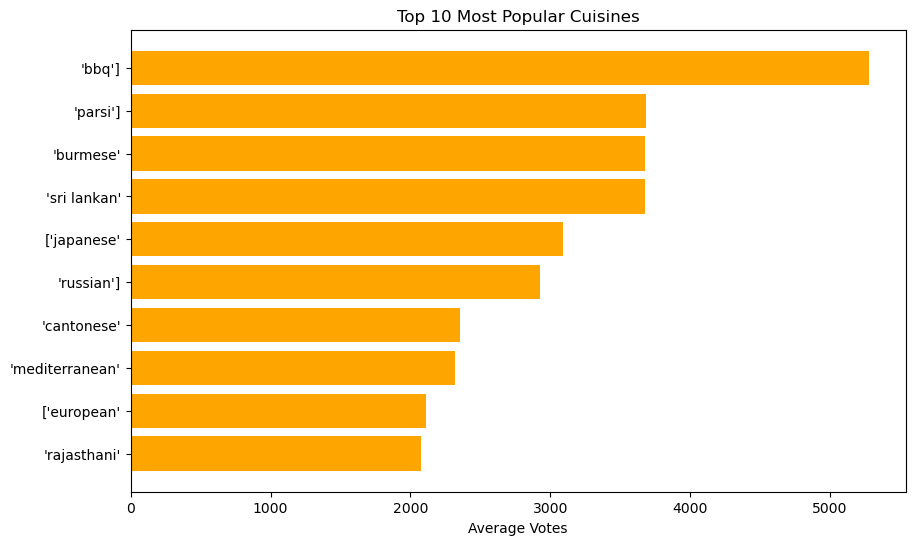

In [ ]:

top = top_by_votes.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top['cuisines'], top['avg_votes'], color='orange')
plt.xlabel('Average Votes')
plt.title('Top 10 Most Popular Cuisines')
plt.gca().invert_yaxis()
plt.show()


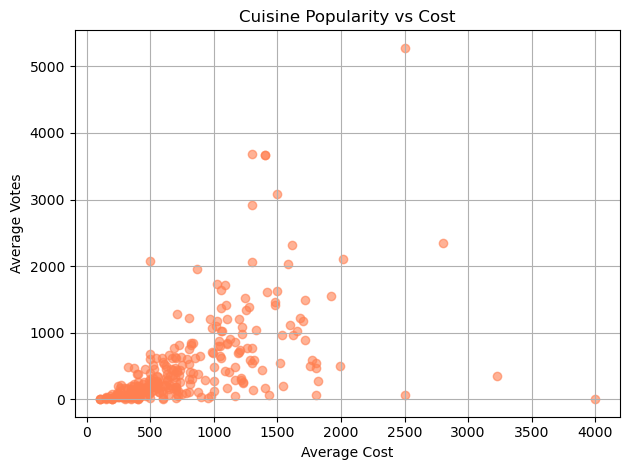

In [ ]:
plt.scatter(cuisine_stats['avg_price'], cuisine_stats['avg_votes'], alpha=0.6, color='coral')
plt.xlabel('Average Cost')
plt.ylabel('Average Votes')
plt.title('Cuisine Popularity vs Cost')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

location_stats = df.groupby('location')[['Rating', 'votes', 'approx_cost(fortwopeople)']].mean().reset_index()
top_locations = location_stats.sort_values('votes', ascending=False).head(10)

rest_type_stats = (
    df.explode('rest_type')
    .groupby('rest_type')[['Rating', 'votes']]
    .mean()
    .sort_values('votes', ascending=False)
    .reset_index()
)

online_stats = df.groupby('online_order')[['Rating', 'votes']].mean().reset_index()


book_stats = df.groupby('book_table')[['Rating', 'votes']].mean().reset_index()



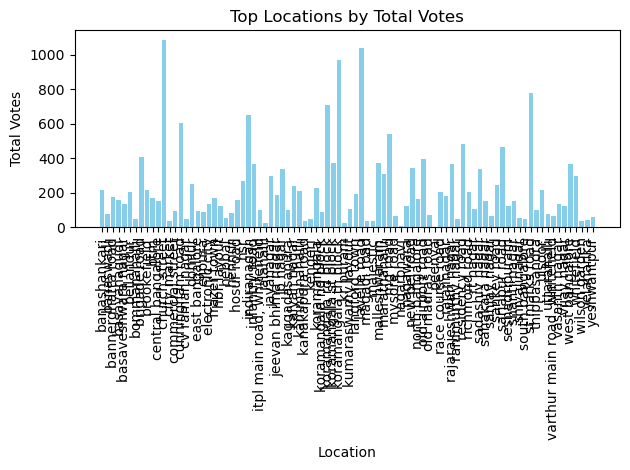

In [ ]:
plt.bar(location_stats['location'], location_stats['votes'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Top Locations by Total Votes")
plt.xlabel("Location")
plt.ylabel("Total Votes")
plt.tight_layout()
plt.show()

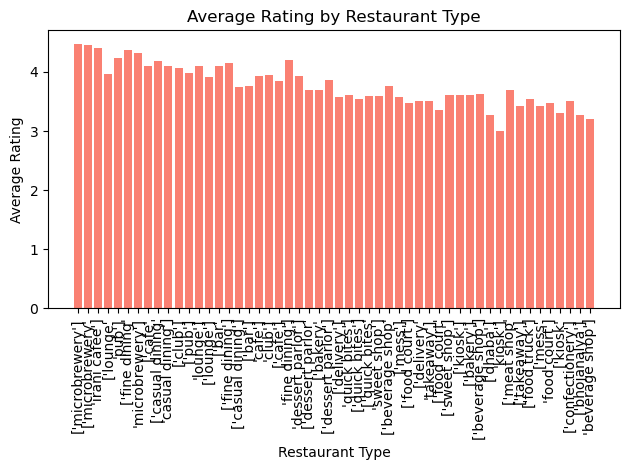

In [ ]:
plt.bar(rest_type_stats['rest_type'], rest_type_stats['Rating'], color='salmon')
plt.xticks(rotation=90)
plt.title("Average Rating by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

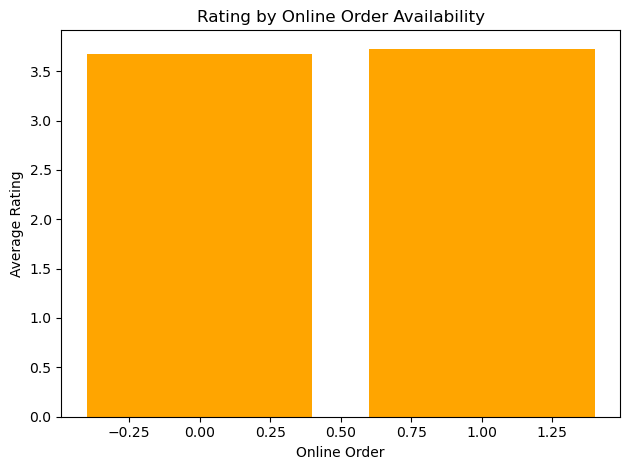

In [ ]:

plt.bar(online_stats['online_order'], online_stats['Rating'], color='orange')
plt.title("Rating by Online Order Availability")
plt.xlabel("Online Order")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()



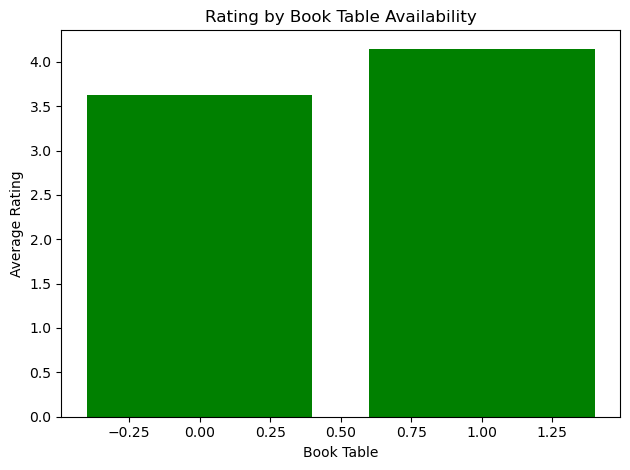

In [ ]:

plt.bar(book_stats['book_table'], book_stats['Rating'], color='green')
plt.title("Rating by Book Table Availability")
plt.xlabel("Book Table")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()